In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
last_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
last_date.date

'2017-08-23'

<AxesSubplot:title={'center':'Precipitation: 8/23/16 - 8/23/17'}, xlabel='date'>

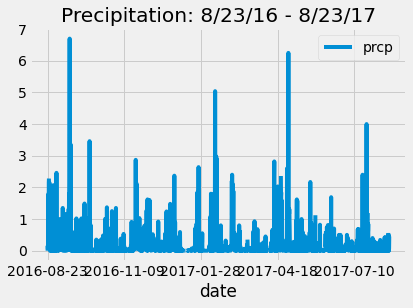

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores

recent_year = (session.query(Measurement.date, Measurement.prcp).filter(
        and_(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23')).order_by(Measurement.date).all())

# Save the query results as a Pandas DataFrame 
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
rain_df = pd.DataFrame(recent_year)
rain_df. rename(columns = {0:'date', 1:'prcp'}, inplace = True)
rain_df.sort_index
rain_df.head()

rain_df.plot(x='date', y = 'prcp', title="Precipitation: 8/23/16 - 8/23/17",)


In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset
stationCount = session.query(Station).count()
print(f"The Station Count is {stationCount}")

The Station Count is 9


In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stationID = active_stations[0][0]
most_active = (session.query(Station.name)
                      .filter_by(station = stationID))
most_active = most_active[0][0]
print(f"The most active station is {stationID}: {most_active}.")

The most active station is USC00519281: WAIHEE 837.5, HI US.


In [39]:
#highest temp
highest_temp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == stationID)
                      .order_by(Measurement.tobs.desc())
                      .first())
highest_temp = highest_temp[0]
print(f"The highest temperature is {highest_temp} degrees.")

The highest temperature is 85.0 degrees.


In [40]:
#lowest temp
lowest_temp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == stationID)
                      .order_by(Measurement.tobs.asc())
                      .first())
lowest_temp = lowest_temp[0]
print(f"The lowest temperature is {lowest_temp} degrees.")

The lowest temperature is 54.0 degrees.


In [41]:
#average temp
average_temp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == stationID))
average_temp = '{0:.3}'.format(average_temp[0][0])
print(f"The average temperature is {average_temp} degrees.")

The average temperature is 71.7 degrees.


<AxesSubplot:ylabel='Frequency'>

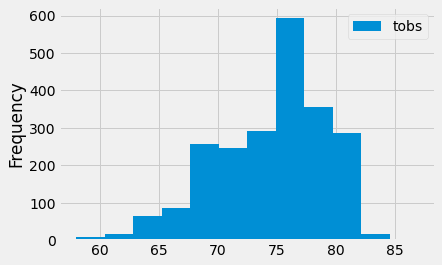

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

recent_year = session.query(Measurement.date, Measurement.tobs).filter(
        and_(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23'))

recent_year_tobs = pd.read_sql(recent_year.statement, recent_year.session.bind)
recent_year_tobs.head()
recent_year_tobs.plot(kind='hist', bins = 12)

# Close session

In [43]:
# Close Session
session.close()